# Nashville Neighborhoods

## Installations

In [2]:
# !pip3 install --upgrade pip

In [3]:
# %pip install geopandas
# %pip install tabulate

## Imports

In [4]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [5]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


## Import Dataset

In [6]:
gdf = geopandas.read_file("nashville_neighborhoods.geojson")

gdf

name                                           geometry
0    Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1          Charlotte Park  MULTIPOLYGON (((-86.8746 36.15758, -86.87317 3...
2                Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3              West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4            White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...
..                    ...                                                ...
283  River Plantation III  MULTIPOLYGON (((-86.946 36.06871, -86.94605 36...
284        Porter Heights  MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ...
285         Avondale Park  MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ...
286          Travis Trace  MULTIPOLYGON (((-87.0188 36.08394, -87.01866 3...
287         Oak Highlands  MULTIPOLYGON (((-86.67565 36.03451, -86.67555 ...

[288 rows x 2 columns]

In [7]:
gdf.describe(include='all')

name                                           geometry
count             288                                                288
unique            287                                                288
top     Oak Highlands  MULTIPOLYGON (((-86.79511056795417 36.17575964...
freq                2                                                  1

### Return Information About Unqiue Values in Select Features

In [8]:
cols_to_check = [
    "name"
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 80:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

name (287)



### Remove Duplicate Neighborhoods

In [9]:
gdf = gdf.drop_duplicates(subset=['name'])

gdf

name                                           geometry
0    Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1          Charlotte Park  MULTIPOLYGON (((-86.8746 36.15758, -86.87317 3...
2                Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3              West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4            White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...
..                    ...                                                ...
282             Robertson  MULTIPOLYGON (((-86.86848 36.16327, -86.86809 ...
283  River Plantation III  MULTIPOLYGON (((-86.946 36.06871, -86.94605 36...
284        Porter Heights  MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ...
285         Avondale Park  MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ...
286          Travis Trace  MULTIPOLYGON (((-87.0188 36.08394, -87.01866 3...

[287 rows x 2 columns]

## Data Visualizations

### Non-Interactive Data Visualization

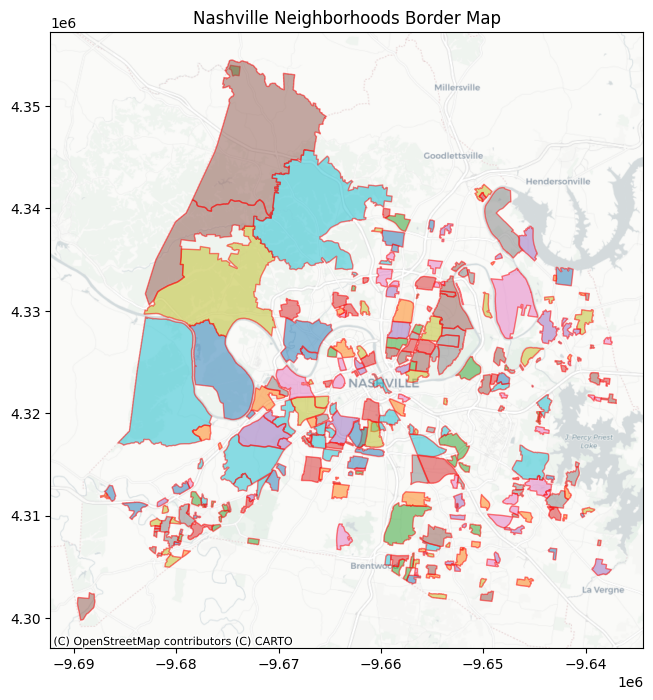

In [10]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='name', ax=ax, alpha=0.5, edgecolor="red")

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Nashville Neighborhoods Border Map")

plt.show()

### Interactive Data Visualization

In [11]:
gdf.explore(
    m = folium.Map(
        location=[36.25, -86.75], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=10,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'black',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': 'grey',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': ['Name']  
    }
)

## Methods & Attributes

### Append Geometry Feature to GeoDataFrame

In [12]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


name                                           geometry  \
0    Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...   
1          Charlotte Park  MULTIPOLYGON (((-86.8746 36.15758, -86.87317 3...   
2                Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...   
3              West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...   
4            White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...   
..                    ...                                                ...   
282             Robertson  MULTIPOLYGON (((-86.86848 36.16327, -86.86809 ...   
283  River Plantation III  MULTIPOLYGON (((-86.946 36.06871, -86.94605 36...   
284        Porter Heights  MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ...   
285         Avondale Park  MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ...   
286          Travis Trace  MULTIPOLYGON (((-87.0188 36.08394, -87.01866 3...   

    geometry_type  
0    MultiPolygon  
1    MultiPolygon  
2    MultiPolygon  
3    MultiPolygon  
4    MultiPolygon  
..            ...  
282  MultiPolygon  
283  MultiPolygon  
284  MultiPolygon  
285  MultiPolygon  
286  MultiPolygon  

[287 rows x 3 columns]

### Add Distance Features to Dataset

In [12]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [13]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

name                                           geometry  \
0    Historic Buena Vista  MULTIPOLYGON (((518425.147 4003462.5, 518521.8...   
1          Charlotte Park  MULTIPOLYGON (((511279.778 4001433.562, 511408...   
2                Hillwood  MULTIPOLYGON (((511144.339 3998989.204, 511171...   
3              West Meade  MULTIPOLYGON (((508653.093 3997877.266, 508703...   
4            White Bridge  MULTIPOLYGON (((512308.088 3998249.974, 512308...   
..                    ...                                                ...   
282             Robertson  MULTIPOLYGON (((511829.514 4002065.689, 511863...   
283  River Plantation III  MULTIPOLYGON (((504862.725 3991570.46, 504857....   
284        Porter Heights  MULTIPOLYGON (((526138.125 4004886.147, 526127...   
285         Avondale Park  MULTIPOLYGON (((501176.477 3992508.844, 501195...   
286          Travis Trace  MULTIPOLYGON (((498306.989 3993259.346, 498320...   

     dist_from_harvard  frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0         1.524458e+06               1.525086e+06                 1.525086e+06  
1         1.531002e+06               1.533862e+06                 1.533862e+06  
2         1.532114e+06               1.536005e+06                 1.536005e+06  
3         1.533268e+06               1.538744e+06                 1.538744e+06  
4         1.530738e+06               1.532959e+06                 1.532959e+06  
..                 ...                        ...                          ...  
282       1.530617e+06               1.532003e+06                 1.532003e+06  
283       1.541932e+06               1.542493e+06                 1.542493e+06  
284       1.516858e+06               1.518748e+06                 1.518748e+06  
285       1.544740e+06               1.546482e+06                 1.546482e+06  
286       1.547010e+06               1.547560e+06                 1.547560e+06  

[287 rows x 5 columns]

### Retrieve Coordinates

In [14]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0   -86.795111  36.175760 NaN
0   -86.794033  36.176724 NaN
0   -86.793958  36.176734 NaN
0   -86.793731  36.176419 NaN
0   -86.793457  36.176007 NaN
..         ...        ...  ..
286 -87.019305  36.083738 NaN
286 -87.019086  36.083876 NaN
286 -87.018861  36.084019 NaN
286 -87.018860  36.084017 NaN
286 -87.018805  36.083944 NaN

[24483 rows x 3 columns]

GDF Count Coordinates:
0       44
1      518
2      269
3      273
4      215
      ... 
282    126
283    175
284     91
285    210
286    162
Length: 287, dtype: int32

GDF Count Geometries:
0      1
1      1
2      1
3      1
4      1
      ..
282    1
283    1
284    1
285    1
286    1
Length: 287, dtype: int32


### Some Basic Functions

In [15]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    287
dtype: int64

is_valid:
True    287
dtype: int64

is_valid_reason:
Valid Geometry    287
dtype: int64

has_z:
False    287
dtype: int64



### Check if Points Are Within Mapped Polygons

In [16]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, name]
Index: []


### Check if Above Listed Points Are NOT Within Mapped Polygons

In [17]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


### Some More Functions

In [18]:
gdf.boundary

0      MULTILINESTRING ((-86.79511 36.17576, -86.7940...
1      MULTILINESTRING ((-86.8746 36.15758, -86.87317...
2      MULTILINESTRING ((-86.87614 36.13554, -86.8758...
3      MULTILINESTRING ((-86.90384 36.12554, -86.9032...
4      MULTILINESTRING ((-86.86321 36.12886, -86.8632...
                             ...                        
282    MULTILINESTRING ((-86.86848 36.16327, -86.8680...
283    MULTILINESTRING ((-86.946 36.06871, -86.94605 ...
284    MULTILINESTRING ((-86.70929 36.18842, -86.7094...
285    MULTILINESTRING ((-86.98693 36.07718, -86.9867...
286    MULTILINESTRING ((-87.0188 36.08394, -87.01866...
Length: 287, dtype: geometry

In [19]:
gdf_projected.buffer(distance=125)

0      POLYGON ((518072.147 4004039.556, 518079.051 4...
1      POLYGON ((509688.109 3999863.254, 509688.344 3...
2      POLYGON ((508747.628 3998090.427, 508749.093 3...
3      POLYGON ((507517.543 3995227.207, 507513.368 3...
4      POLYGON ((511613.419 3998591.012, 511601.897 3...
                             ...                        
282    POLYGON ((510982.626 4001864.114, 511002.34 40...
283    POLYGON ((504954.591 3991485.693, 504945.708 3...
284    POLYGON ((525769.892 4004716, 525621.668 40047...
285    POLYGON ((499621.77 3992592.479, 499625.445 39...
286    POLYGON ((497787.413 3992958.309, 497787.148 3...
Length: 287, dtype: geometry

In [20]:
gdf_projected.centroid

0      POINT (518263.225 4003385.725)
1      POINT (510877.202 4000691.404)
2       POINT (510703.322 3997916.18)
3      POINT (509652.464 3995800.355)
4      POINT (512534.714 3999206.255)
                    ...              
282    POINT (511780.142 4001616.998)
283     POINT (504849.432 3991891.37)
284    POINT (525389.666 4005277.782)
285    POINT (500644.112 3992124.945)
286    POINT (498277.095 3993032.544)
Length: 287, dtype: geometry

In [21]:
gdf.convex_hull

0      POLYGON ((-86.7983 36.17168, -86.79924 36.173,...
1      POLYGON ((-86.88558 36.14193, -86.89114 36.142...
2      POLYGON ((-86.86566 36.11581, -86.89389 36.117...
3      POLYGON ((-86.89048 36.09033, -86.90684 36.090...
4      POLYGON ((-86.85562 36.12471, -86.857 36.12532...
                             ...                        
282    POLYGON ((-86.86008 36.15253, -86.86015 36.152...
283    POLYGON ((-86.946 36.06871, -86.94795 36.06996...
284    POLYGON ((-86.70942 36.1875, -86.71163 36.1876...
285    POLYGON ((-86.99566 36.06532, -86.99611 36.065...
286    POLYGON ((-87.01605 36.07998, -87.01789 36.080...
Length: 287, dtype: geometry

In [22]:
gdf.envelope

0      POLYGON ((-86.80046 36.17168, -86.79168 36.171...
1      POLYGON ((-86.89114 36.14193, -86.86132 36.141...
2      POLYGON ((-86.90238 36.11581, -86.85573 36.115...
3      POLYGON ((-86.91795 36.09033, -86.86179 36.090...
4      POLYGON ((-86.87247 36.12471, -86.85215 36.124...
                             ...                        
282    POLYGON ((-86.8794 36.15253, -86.85842 36.1525...
283    POLYGON ((-86.94795 36.06871, -86.94509 36.068...
284    POLYGON ((-86.72886 36.1875, -86.70854 36.1875...
285    POLYGON ((-87.00424 36.06532, -86.98178 36.065...
286    POLYGON ((-87.02334 36.07998, -87.01539 36.079...
Length: 287, dtype: geometry

In [23]:
gdf.extract_unique_points()

0      MULTIPOINT (-86.79511 36.17576, -86.79403 36.1...
1      MULTIPOINT (-86.8746 36.15758, -86.87317 36.15...
2      MULTIPOINT (-86.87614 36.13554, -86.87583 36.1...
3      MULTIPOINT (-86.90384 36.12554, -86.90328 36.1...
4      MULTIPOINT (-86.86321 36.12886, -86.86321 36.1...
                             ...                        
282    MULTIPOINT (-86.86848 36.16327, -86.86809 36.1...
283    MULTIPOINT (-86.946 36.06871, -86.94605 36.068...
284    MULTIPOINT (-86.70929 36.18842, -86.70942 36.1...
285    MULTIPOINT (-86.98693 36.07718, -86.98672 36.0...
286    MULTIPOINT (-87.0188 36.08394, -87.01866 36.08...
Length: 287, dtype: geometry

In [24]:
gdf.force_2d()

0      MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1      MULTIPOLYGON (((-86.8746 36.15758, -86.87317 3...
2      MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3      MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4      MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...
                             ...                        
282    MULTIPOLYGON (((-86.86848 36.16327, -86.86809 ...
283    MULTIPOLYGON (((-86.946 36.06871, -86.94605 36...
284    MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ...
285    MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ...
286    MULTIPOLYGON (((-87.0188 36.08394, -87.01866 3...
Length: 287, dtype: geometry

In [25]:
gdf.minimum_bounding_circle()

0      POLYGON ((-86.79059 36.17656, -86.7907 36.1755...
1      POLYGON ((-86.86051 36.14781, -86.86081 36.144...
2      POLYGON ((-86.85572 36.12509, -86.85617 36.120...
3      POLYGON ((-86.86002 36.10487, -86.8606 36.0990...
4      POLYGON ((-86.84612 36.13754, -86.84638 36.134...
                             ...                        
282    POLYGON ((-86.85806 36.15679, -86.85826 36.154...
283    POLYGON ((-86.94209 36.07236, -86.94216 36.071...
284    POLYGON ((-86.70818 36.19236, -86.70839 36.190...
285    POLYGON ((-86.98176 36.07617, -86.98198 36.073...
286    POLYGON ((-87.01531 36.08126, -87.01539 36.080...
Length: 287, dtype: geometry

In [26]:
gdf.minimum_clearance()

0      5.856194e-05
1      4.097047e-08
2      4.973846e-06
3      6.733282e-05
4      4.952501e-06
           ...     
282    1.168190e-05
283    5.523739e-06
284    4.233376e-06
285    5.698648e-08
286    1.854223e-08
Length: 287, dtype: float64

In [27]:
gdf.minimum_rotated_rectangle()

0      POLYGON ((-86.79381 36.1817, -86.80134 36.1797...
1      POLYGON ((-86.89114 36.14283, -86.86493 36.136...
2      POLYGON ((-86.85503 36.13755, -86.9016 36.1400...
3      POLYGON ((-86.92022 36.09384, -86.87067 36.080...
4      POLYGON ((-86.85582 36.12255, -86.84289 36.141...
                             ...                        
282    POLYGON ((-86.87948 36.15928, -86.86405 36.146...
283    POLYGON ((-86.94567 36.06857, -86.94306 36.075...
284    POLYGON ((-86.7085 36.19546, -86.72803 36.1974...
285    POLYGON ((-86.98893 36.08665, -87.00436 36.076...
286    POLYGON ((-87.01483 36.0832, -87.02277 36.0848...
Length: 287, dtype: geometry

In [28]:
gdf.normalize()

0      MULTIPOLYGON (((-86.80046 36.17808, -86.80039 ...
1      MULTIPOLYGON (((-86.89114 36.14283, -86.89106 ...
2      MULTIPOLYGON (((-86.90238 36.12558, -86.90221 ...
3      MULTIPOLYGON (((-86.91795 36.09474, -86.91736 ...
4      MULTIPOLYGON (((-86.87247 36.13403, -86.87236 ...
                             ...                        
282    MULTIPOLYGON (((-86.8794 36.15922, -86.87863 3...
283    MULTIPOLYGON (((-86.94795 36.06996, -86.94754 ...
284    MULTIPOLYGON (((-86.72886 36.18945, -86.72863 ...
285    MULTIPOLYGON (((-87.00424 36.0768, -87.00402 3...
286    MULTIPOLYGON (((-87.02334 36.08204, -87.02333 ...
Length: 287, dtype: geometry

In [29]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Map

In [30]:
translated_gdf = gdf.translate(xoff=2.5, yoff=-2.5)

translated_gdf.explore()

### Add Distance Features to Dataset

In [31]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [32]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

name                                           geometry  \
0    Historic Buena Vista  MULTIPOLYGON (((518425.147 4003462.5, 518521.8...   
1          Charlotte Park  MULTIPOLYGON (((511279.778 4001433.562, 511408...   
2                Hillwood  MULTIPOLYGON (((511144.339 3998989.204, 511171...   
3              West Meade  MULTIPOLYGON (((508653.093 3997877.266, 508703...   
4            White Bridge  MULTIPOLYGON (((512308.088 3998249.974, 512308...   
..                    ...                                                ...   
282             Robertson  MULTIPOLYGON (((511829.514 4002065.689, 511863...   
283  River Plantation III  MULTIPOLYGON (((504862.725 3991570.46, 504857....   
284        Porter Heights  MULTIPOLYGON (((526138.125 4004886.147, 526127...   
285         Avondale Park  MULTIPOLYGON (((501176.477 3992508.844, 501195...   
286          Travis Trace  MULTIPOLYGON (((498306.989 3993259.346, 498320...   

     dist_from_harvard  frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0         1.524458e+06               1.525086e+06                 1.525086e+06  
1         1.531002e+06               1.533862e+06                 1.533862e+06  
2         1.532114e+06               1.536005e+06                 1.536005e+06  
3         1.533268e+06               1.538744e+06                 1.538744e+06  
4         1.530738e+06               1.532959e+06                 1.532959e+06  
..                 ...                        ...                          ...  
282       1.530617e+06               1.532003e+06                 1.532003e+06  
283       1.541932e+06               1.542493e+06                 1.542493e+06  
284       1.516858e+06               1.518748e+06                 1.518748e+06  
285       1.544740e+06               1.546482e+06                 1.546482e+06  
286       1.547010e+06               1.547560e+06                 1.547560e+06  

[287 rows x 5 columns]

### Iterate Through All Rows

In [33]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: name                                     Historic Buena Vista
geometry    MULTIPOLYGON (((-86.79511056795417 36.17575964...
Name: 0, dtype: object
All Data: name                                           Charlotte Park
geometry    MULTIPOLYGON (((-86.87459668651866 36.15757702...
Name: 1, dtype: object
All Data: name                                                 Hillwood
geometry    MULTIPOLYGON (((-86.87613708067906 36.13554098...
Name: 2, dtype: object
All Data: name                                               West Meade
geometry    MULTIPOLYGON (((-86.9038380396094 36.125541480...
Name: 3, dtype: object
All Data: name                                             White Bridge
geometry    MULTIPOLYGON (((-86.86321427797685 36.12886222...
Name: 4, dtype: object
All Data: name                                                East Hill
geometry    MULTIPOLYGON (((-86.74659463915211 36.20375697...
Name: 5, dtype: object
All Data: name                                            

### Iterate Through All Features

In [34]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'name': 'Historic Buena Vista'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [(((-86.79511056795417, 36.17575964963348), (-86.79403325521203, 36.176723819622765), (-86.79395847673587, 36.176734201205555), (-86.79373059621346, 36.17641850227536), (-86.79345684770965, 36.176007328547804), (-86.7933653702227, 36.17592609720739), (-86.79294909679425, 36.17527664780614), (-86.79276591717007, 36.175119620028575), (-86.79252941560033, 36.17471240878589), (-86.79204396927803, 36.17393170332863), (-86.79167790414918, 36.17334940652481), (-86.7916936044697, 36.17329298843413), (-86.79203101691085, 36.1731861114189), (-86.79474163086816, 36.17249213438422), (-86.79601903802255, 36.17218267273473), (-86.79764416397879, 36.17179978743778), (-86.79830164245051, 36.17168336043859), (-86.79879977448026, 36.17243166386886), (-86.79924036890505, 36.1729960002125), (-86.79949254372757, 36.1733962443001), (-86.7996258521679, 36.17371402180879), (-86.79

### Interface

In [35]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'name': 'Historic Buena Vista'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [(((-86.79511056795417, 36.17575964963348),
       (-86.79403325521203, 36.176723819622765),
       (-86.79395847673587, 36.176734201205555),
       (-86.79373059621346, 36.17641850227536),
       (-86.79345684770965, 36.176007328547804),
       (-86.7933653702227, 36.17592609720739),
       (-86.79294909679425, 36.17527664780614),
       (-86.79276591717007, 36.175119620028575),
       (-86.79252941560033, 36.17471240878589),
       (-86.79204396927803, 36.17393170332863),
       (-86.79167790414918, 36.17334940652481),
       (-86.7916936044697, 36.17329298843413),
       (-86.79203101691085, 36.1731861114189),
       (-86.79474163086816, 36.17249213438422),
       (-86.79601903802255, 36.17218267273473),
       (-86.79764416397879, 36.17179978743778),
       (-86.79830164245051, 36.17168336043859),

## Save Cleaned Dataset to File

In [36]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/